In [69]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import matplotlib.pyplot as plt
import numpy as np
import random as ran

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [70]:
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

In [71]:
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [72]:
x_train, y_train = TRAIN_SIZE(55000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)



[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


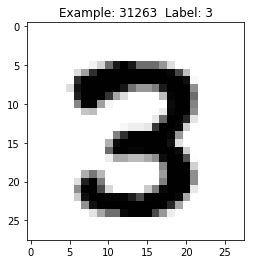

In [75]:
display_digit(ran.randint(0, x_train.shape[0]))

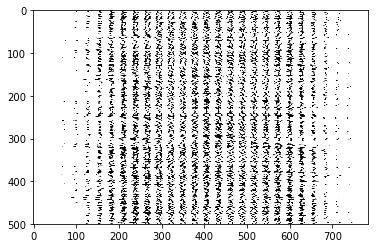

In [76]:
display_mult_flat(0,500)

In [86]:
import tensorflow as tf
sess = tf.Session()

In [87]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [88]:
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [89]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [90]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [91]:
print(y)

Tensor("Softmax_5:0", shape=(?, 10), dtype=float32)


In [92]:
x_train, y_train = TRAIN_SIZE(500)
sess.run(tf.global_variables_initializer())
#If using TensorFlow prior to 0.12 use:
#sess.run(tf.initialize_all_variables())
print(sess.run(y, feed_dict={x: x_train}))

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (500, 784)
y_train Examples Loaded = (500, 10)

[[ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 ..., 
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]]


In [93]:
sess.run(tf.nn.softmax(tf.zeros([4])))
sess.run(tf.nn.softmax(tf.constant([0.1, 0.005, 2])))

array([ 0.11634309,  0.10579926,  0.7778576 ], dtype=float32)

In [94]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [95]:
j = [0.03, 0.03, 0.01, 0.9, 0.01, 0.01, 0.0025,0.0025, 0.0025, 0.0025]

In [96]:
k = [0,0,0,1,0,0,0,0,0,0]

In [97]:
-np.log(j)
-np.multiply(np.log(j),k)

array([ 0.        ,  0.        ,  0.        ,  0.10536052,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [98]:
k = [0,0,1,0,0,0,0,0,0,0]
-np.multiply(np.log(j),k)

array([ 0.        ,  0.        ,  4.60517019,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [103]:
x_train, y_train = TRAIN_SIZE(10000)
x_test, y_test = TEST_SIZE(5000)
LEARNING_RATE = 0.5
TRAIN_STEPS = 5000

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (10000, 784)
y_train Examples Loaded = (10000, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (5000, 784)
y_test Examples Loaded = (5000, 10)


In [104]:
init = tf.global_variables_initializer()
#If using TensorFlow prior to 0.12 use:
#init = tf.initialize_all_variables()
sess.run(init)

In [105]:
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [106]:
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))

Training Step:0  Accuracy =  0.608  Loss = 1.82618
Training Step:100  Accuracy =  0.8704  Loss = 0.387358
Training Step:200  Accuracy =  0.8802  Loss = 0.336251
Training Step:300  Accuracy =  0.8816  Loss = 0.311294
Training Step:400  Accuracy =  0.8848  Loss = 0.295085
Training Step:500  Accuracy =  0.887  Loss = 0.283195
Training Step:600  Accuracy =  0.8872  Loss = 0.273859
Training Step:700  Accuracy =  0.8874  Loss = 0.266196
Training Step:800  Accuracy =  0.8886  Loss = 0.259709
Training Step:900  Accuracy =  0.8896  Loss = 0.254089
Training Step:1000  Accuracy =  0.8896  Loss = 0.249136
Training Step:1100  Accuracy =  0.8892  Loss = 0.244708
Training Step:1200  Accuracy =  0.8892  Loss = 0.240705
Training Step:1300  Accuracy =  0.8892  Loss = 0.237052
Training Step:1400  Accuracy =  0.89  Loss = 0.233694
Training Step:1500  Accuracy =  0.8898  Loss = 0.230585
Training Step:1600  Accuracy =  0.8898  Loss = 0.227691
Training Step:1700  Accuracy =  0.8896  Loss = 0.224984
Training 

In [107]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

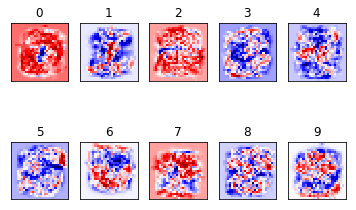

In [108]:
plt.show()

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (5000, 784)
y_train Examples Loaded = (5000, 10)

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


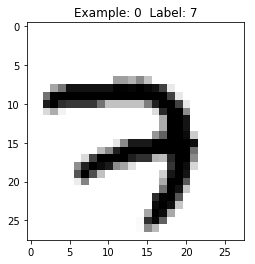

In [84]:
x_train, y_train = TRAIN_SIZE(5000)
display_digit(0)

In [78]:
answer = sess.run(y, feed_dict={x: x_train})
print(answer)

[[  2.12480318e-05   1.16469255e-05   8.96317363e-02   1.92015339e-02
    8.20864108e-04   1.25168190e-05   3.85382300e-05   8.53746057e-01
    6.91888854e-03   2.95969490e-02]]


In [79]:
answer.argmax()

7

In [58]:
def display_compare(num):
    # THIS WILL LOAD ONE TRAINING EXAMPLE
    x_train = mnist.train.images[num,:].reshape(1,784)
    y_train = mnist.train.labels[num,:]
    # THIS GETS OUR LABEL AS A INTEGER
    label = y_train.argmax()
    # THIS GETS OUR PREDICTION AS A INTEGER
    prediction = sess.run(y, feed_dict={x: x_train}).argmax()
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()

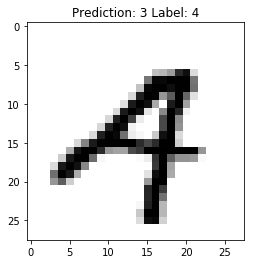

In [61]:
display_compare(ran.randint(0, 55000))

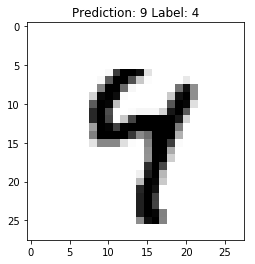

In [63]:
display_compare(2)